<a href="https://colab.research.google.com/github/grandfatherr/KNN-and-Naive-Bayes/blob/main/Edwin_Mutuma_Core_Week_9_IP_KNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the Question

### a) Specifying the Data Analytic Question

This project will be an implementation of the K-nearest neighbor (kNN) classifier and Naive Bayes classifier. We will then conduct experiments on them and finally, we'll calculate the resulting metrics.

### b) Defining the Metric for Success

The metric of success is if we can create a K-NN model that can make correct predictions on the survival 

### c) Understanding the context 

The Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.

### d) Recording the Experimental Design

For the project to be a success, the following steps will be followed:

Read and explore the given dataset.

Clean the data

Perform exploratory data analysis.

Perform feature engineering

Creating our Model

Challenge your solution by providing insights on how you can make improvements in model improvement.


### e) Data Relevance

## Reading the Data

In [ ]:
# Import the necessary libraries to be used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train = pd.read_csv('train (5).csv')
test  = pd.read_csv('test (1) (1).csv')

## Checking the Data

In [ ]:
# Determining the no. of records in our train dataset
#
train.shape

(891, 12)

In [ ]:
# Determining the no. of records in our test dataset
#
test.shape

(418, 11)

In [ ]:
# Previewing the top of our train dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the top of our test dataset
#
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the bottom of our train dataset
# 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Previewing the bottom of our test dataset
# 
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Appropriateness of the train datatypes
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Appropriateness of the test datatypes
#
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Check the unique values of the train dataset columns
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
# Check the unique values of the test dataset columns
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## Tidying the Dataset

In [ ]:
# Checking for missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Checking for missing data
#
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Dealing with the missing values for the datasets
train.Age.fillna(train.Age.mean(), inplace= True)
test.Age.fillna(test.Age.mean(), inplace= True)

In [ ]:
# Dealing with the null values
train.drop('Cabin', axis=1, inplace= True)
test.drop('Cabin', axis= 1, inplace= True)
train.dropna(inplace= True)
test.dropna(inplace= True)

In [ ]:
# Checking for duplicates
train.duplicated().sum()

0

In [ ]:
# Test data duplicates
test.duplicated().sum()

0

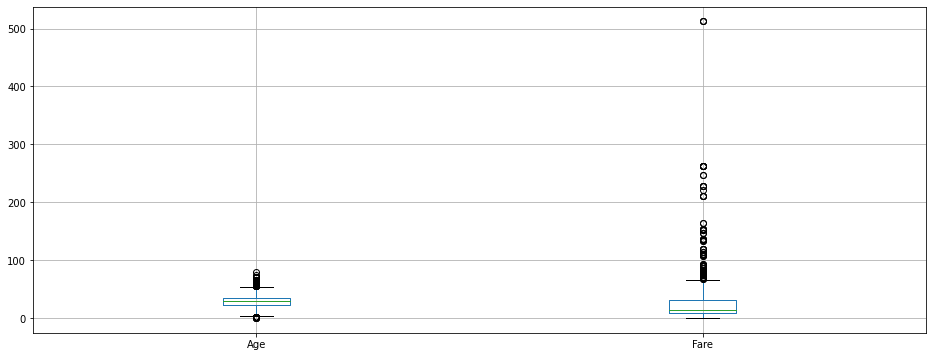

In [ ]:
# Check the outliers in our data

train.boxplot(figsize=(16,6),column=['Age', 'Fare'])


The outliers for our ages are contextual outiers and as such won't be dropped because it's possible to have ages that lie within our purview 

## Exploratory Analysis

###a) Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


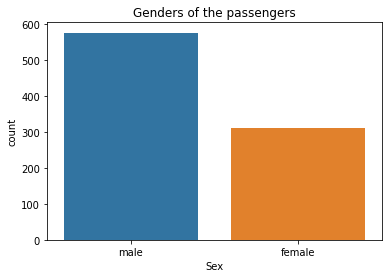

In [ ]:
# countplots
sns.countplot(train.Sex)
plt.title('Genders of the passengers')
plt.show()

Onboard the titanic, were almost twice as many men as there were women.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


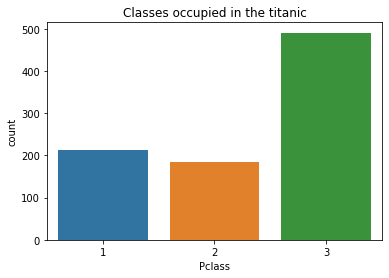

In [ ]:
# Countplots for class
sns.countplot(train.Pclass)
plt.title('Classes occupied in the titanic')
plt.show()

Most of the passengers had occupied the 3rd class which is expected as that was the cheapest option as compared to the first and second classes. The first class had a slightly higher occupancy rate than the second class.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


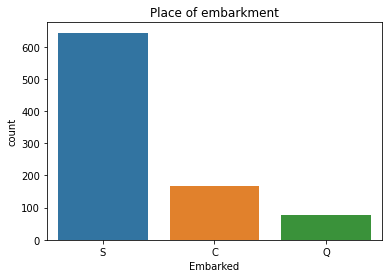

In [ ]:
# Countplots for point embarked
sns.countplot(train.Embarked)
plt.title('Place of embarkment')
plt.show()

Most passengers onboard the titanic actually did board the ship at Southampton which was the point of departure for the ship

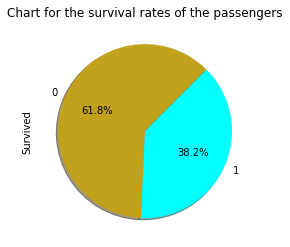

In [ ]:
# Pie chart showing the survival rates
colors = [ '#c2a11d','cyan']
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 45)
plt.title('Chart for the survival rates of the passengers')
plt.show()

After the horrible accident, most of the passengers on the titanic did not survive. 61.8% of the passengers died.

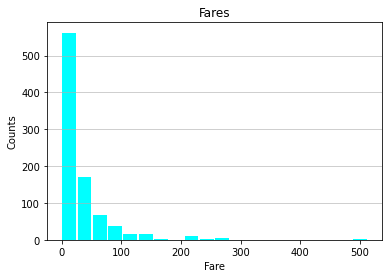

In [ ]:
#Plotting a histogram to show the age ditribution
size, scale = 1000, 10
fares = train.Fare

fares.plot.hist(grid=False, bins=20, rwidth=0.9,
                   color='cyan')
plt.title('Fares')
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

###b) Bivariate Analysis

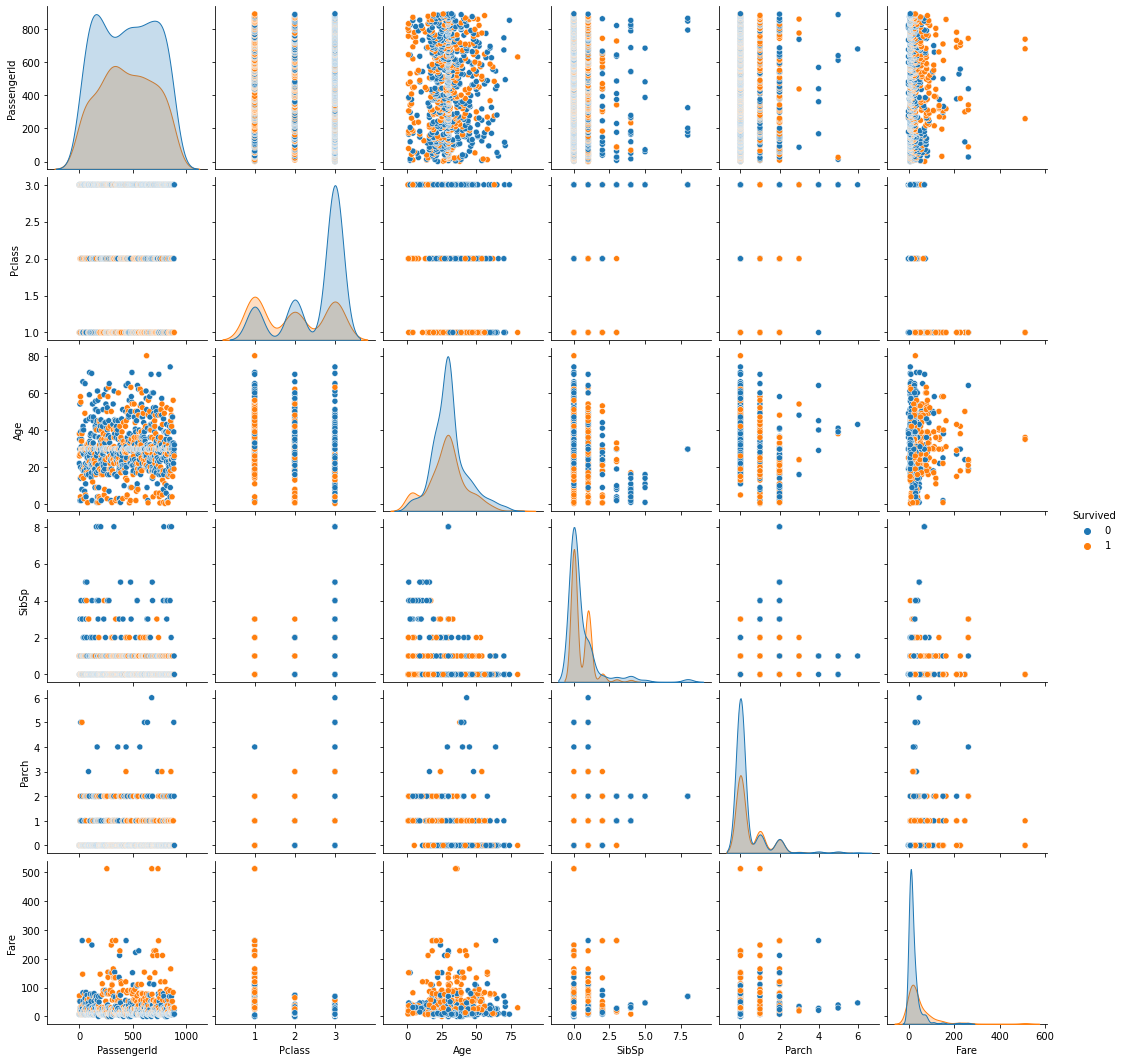

In [ ]:
sns.pairplot(train, hue='Survived')

In [ ]:
#
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


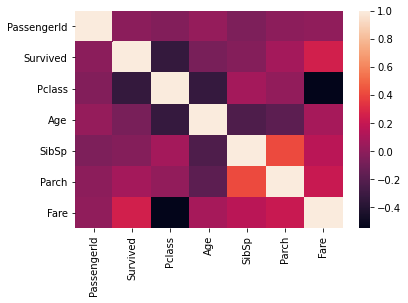

In [ ]:
sns.heatmap(train.corr())

## Feature engineering

In [ ]:
# Check the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Dropping the columms we won't be needing in the implementation
train.drop(['PassengerId', 'Name', 'Ticket'], axis= 1, inplace= True)

In [ ]:
# Check the records we have 
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Perform label encoding on the sex column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.Sex = le.fit_transform(train.Sex)

#One hot encode Embarked column using get dummies
train = pd.get_dummies(train)

In [ ]:
# check to ensure
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
# Multicollinearity test

correlations = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].corr()

correlations

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000


In [ ]:
# Perform a VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.647311,0.480159,0.827320,0.259835,0.162191,0.053860,-0.069273
Pclass,0.480159,1.803243,0.105829,0.497622,-0.101338,-0.104798,0.880000
Sex,0.827320,0.105829,1.515923,0.023369,0.084538,0.263615,0.046593
Age,0.259835,0.497622,0.023369,1.243216,0.210355,0.100437,0.044819
SibSp,0.162191,-0.101338,0.084538,0.210355,1.289672,-0.441927,-0.211742
Parch,0.053860,-0.104798,0.263615,0.100437,-0.441927,1.317618,-0.248183
Fare,-0.069273,0.880000,0.046593,0.044819,-0.211742,-0.248183,1.592563


## Implementing the Solution

### 80-20 split

In [ ]:
# Defining the features and the labels of the model
X = train.drop('Survived', axis=1)
y = train.Survived

In [ ]:
# Splitting the datasets into train and test samples
# Splitting 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Performing feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#create and fit model
clf = KNeighborsClassifier()
model1 = clf.fit(X_train, y_train) 
y_pred = model1.predict(X_test)

# Model evaluation
print('Model 1: 80-20 split performance')
print('**********')
print(accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Model 1: 80-20 split performance
**********
0.7191011235955056
              precision    recall  f1-score   support

           0       0.74      0.82      0.77       105
           1       0.69      0.58      0.63        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.71       178



### 70-30 split

In [ ]:
# Defining the features and the labels of the model
X = train.drop('Survived', axis=1)
y = train.Survived

In [ ]:
# Splitting the datasets into train and test samples
# Splitting 70/30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Performing feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#create and fit model
clf = KNeighborsClassifier()
model_2 = clf.fit(X_train, y_train) 
y_pred = model_2.predict(X_test)

# Model evaluation
print('Model 2: 70-30 split performance')
print('**********')
print(accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Model 2: 70-30 split performance
**********
0.7752808988764045
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       157
           1       0.77      0.65      0.71       110

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



### 60-40 split

In [ ]:
# Defining the features and the labels of the model
X = train.drop('Survived', axis=1)
y = train.Survived

In [ ]:
# Splitting the datasets into train and test samples
# Splitting 60/40

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Performing feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#create and fit model
clf = KNeighborsClassifier()
model_3 = clf.fit(X_train, y_train) 
y_pred = model_3.predict(X_test)

# Model evaluation
print('Model 3: 60-40 split performance')
print('**********')
print(accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Model 3: 60-40 split performance
**********
0.7808988764044944
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       216
           1       0.75      0.66      0.70       140

    accuracy                           0.78       356
   macro avg       0.77      0.76      0.76       356
weighted avg       0.78      0.78      0.78       356



So far, model 3 with 60% train and 40% test size has given us the best accuracy as well as the best precision score

## Challenging the solution

### LDA

In [ ]:
# Defining the features and the labels of the model
X = train.drop('Survived', axis=1)
y = train.Survived

In [ ]:
# Splitting the datasets into train and test samples
# Splitting 60/40

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Performing feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Create model and fit
clf = KNeighborsClassifier()
model_4 = clf.fit(X_train, y_train) 
y_pred = model_4.predict(X_test)

# Model evaluation
print('Model 4: LDA and 60-40 split performance')
print('**********')
print(accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Model 4: LDA and 60-40 split performance
**********
0.7640449438202247
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       216
           1       0.75      0.59      0.66       140

    accuracy                           0.76       356
   macro avg       0.76      0.73      0.74       356
weighted avg       0.76      0.76      0.76       356



### Hyperparameter tuning

In [ ]:
# Tuning to get the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_neighbors': [27, 29, 31],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

search = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [27, 29, 31],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Getting the best parameters
search.best_params_

{'metric': 'euclidean', 'n_neighbors': 31, 'weights': 'uniform'}

The square root of the records is one of the best ways to get the optimal k value for our KNearest algorithm. After getting the square root, we get 29.8 so our neighbours have to be within the said range.

The parameters we get after tuning the parameters are the ones we will input as our parameters to try and improve the performance of the model.

In [ ]:
clf = KNeighborsClassifier(n_neighbors= 31, weights= 'uniform', metric='euclidean')

#create and fit model
model5 = clf.fit(X_train, y_train) 
y_pred = model5.predict(X_test)

# Model evaluation
print('Model 5: Tuned')
print('******************************')
print(accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Model 5: Tuned
******************************
0.7780898876404494
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       216
           1       0.80      0.58      0.67       140

    accuracy                           0.78       356
   macro avg       0.79      0.74      0.75       356
weighted avg       0.78      0.78      0.77       356



After tuning our parameters, we achieve a similar accuracy as our 3rd model that had a 0.6 training data. However, we achieve better precision, recall and f1-score after the tune.

## Follow up questions

### a). Did we have the right data?

Yes we did. The dataset availed allowed us to perform implementation of the K-Nearest Neighbors algorithm since the dataset wasn't too big, we had no noise and our data was labeled.

### b). Do we need other data to answer our question?

There is nothing such as too much data. More is good as it helps give our model more training data. However, K-NN doesn't do well with too big datasets so the data we had was enough.

### c). Did we have the right question?